In [10]:
import SkopeDataReader

import numpy as np
from matplotlib import pyplot as plt
from scipy import io

from girf_utils import get_skope_girf


In [8]:
# --- Read Gradient Waveforms

waves = io.loadmat("./girf_skope_waves.mat")['waves']
waves[:,0] *= -1

print(f'{waves.shape = }')

waves.shape = (216, 3, 16000)


In [4]:
# --- Read Skope Data

# set scan path & nr
dataPath = './private_skope_data/'

scan = SkopeDataReader.DataReader(dataPath, 6)
trigger_time = scan.getTriggerTimeData()
kdata = scan.getData('kspha')

print(f'{kdata.shape = }')

kdata.shape = (100000, 16, 1, 216)


In [11]:
# --- Get data arranged by acquisition ordering

all_cam = np.zeros((4,2,9,3,4,100000))
all_grad = np.zeros((4,2,9,3,3,16000))

ii = 0
for i0 in range(4): # type
    for i1 in range(2): # polarity
        for i2 in range(9): # wave number
            for i3 in range(3):  # direction

                wave_camera = np.gradient(kdata[:,:4,0,ii], axis=0).T/267.522187  # Just load 0th order and linear terms for now
                wave_grad = waves[ii,:]

                all_cam[i0,i1,i2,i3] = wave_camera
                all_grad[i0,i1,i2,i3] = wave_grad

                ii += 1

skope_res = {'all_cam': all_cam, 'all_grad': all_grad}

print(f'{ii = }  {all_cam.shape = }  {all_grad.shape = }')

ii = 216  all_cam.shape = (4, 2, 9, 3, 4, 100000)  all_grad.shape = (4, 2, 9, 3, 3, 16000)


In [13]:
# --- Solve for the GIRF

fwhm = 12000
waves = [0,1,2,3]
do_filt = 80000
weiner_reg = 1e4

f_H, H0, H1, all_waves = get_skope_girf(skope_res, waves,wave_dir=0, weiner_reg = weiner_reg, do_filt=do_filt)

Text(0.5, 1.0, 'H1')

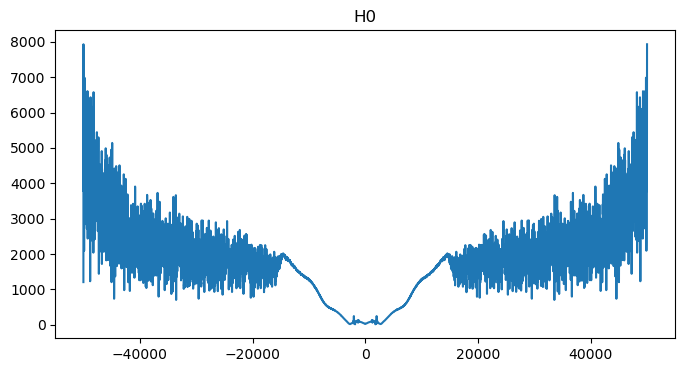

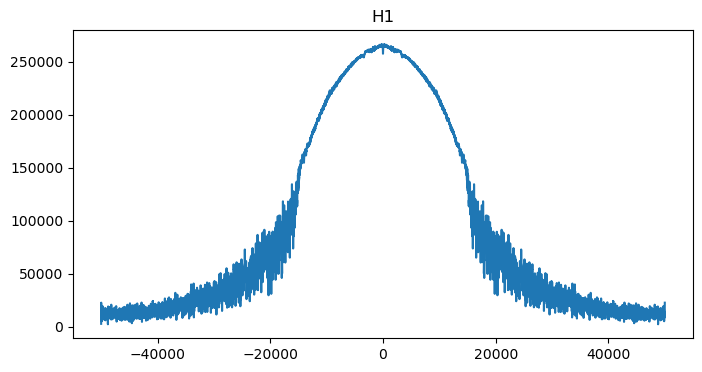

In [16]:
plt.figure(figsize=(8,4))
plt.plot(f_H, np.abs(H0))
plt.title('H0')

plt.figure(figsize=(8,4))
plt.plot(f_H, np.abs(H1))
plt.title('H1')